In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
age_wwhs = pd.read_csv('./data/age_wwhs.csv', encoding='cp949')
entry_count_tracker = []
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.dropna(inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.loc[age_wwhs['기준년도']==2013, '연령대코드(5세단위)'] += 4

<Figure size 1000x600 with 0 Axes>

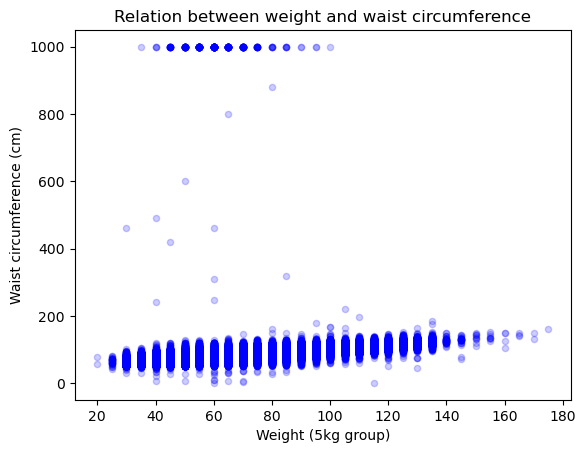

In [25]:
plt.figure(figsize=(10, 6))
age_wwhs.plot.scatter(x='체중(5kg단위)', y='허리둘레', alpha=0.2, color='blue')
plt.title('Relation between weight and waist circumference')
plt.xlabel('Weight (5kg group)')
plt.ylabel('Waist circumference (cm)')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


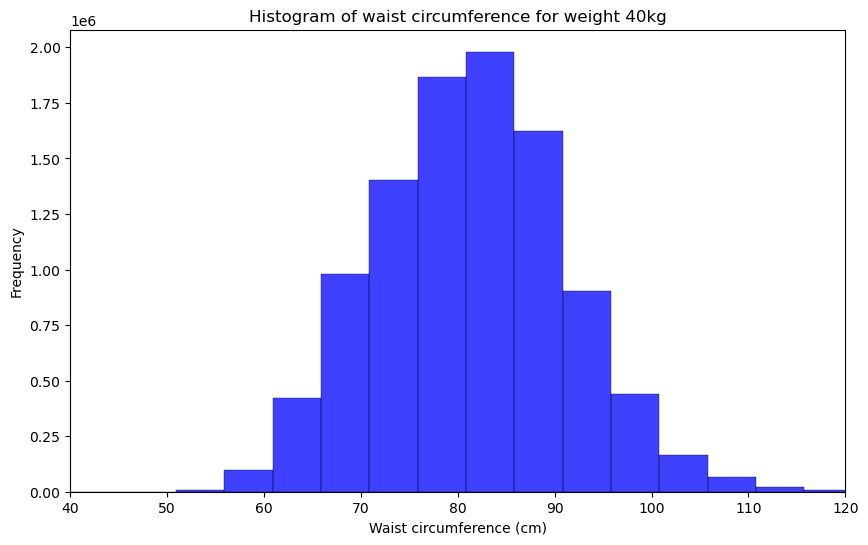

In [26]:
# Histograms of sight (left)
plt.figure(figsize=(10, 6))
sns.histplot(data=age_wwhs['체중(5kg단위)']==40, x=age_wwhs['허리둘레'], color='blue', bins=200)
plt.title('Histogram of waist circumference for weight 40kg')
plt.xlabel('Waist circumference (cm)')
plt.ylabel('Frequency')
plt.xlim(40, 120)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


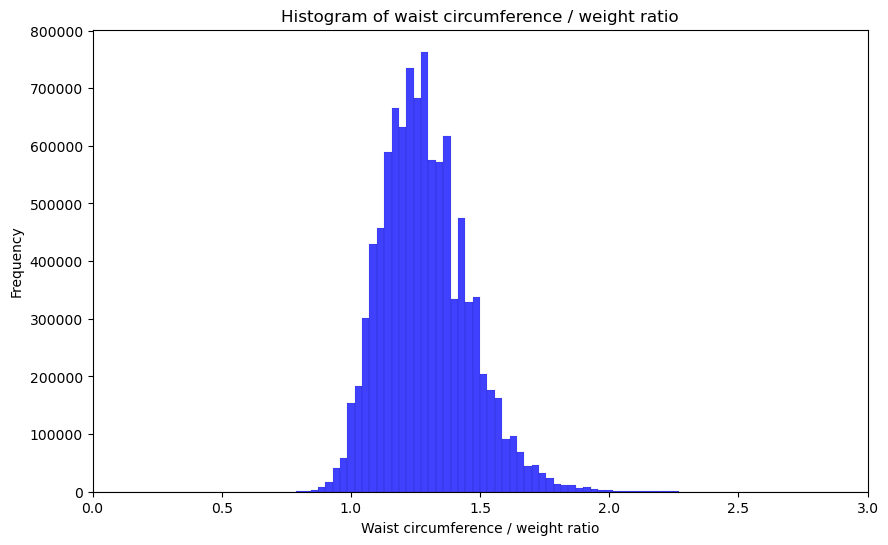

In [27]:
age_wwhs['waist_over_weight_ratio'] = age_wwhs['허리둘레'] / age_wwhs['체중(5kg단위)']
plt.figure(figsize=(10, 6))
sns.histplot(data=age_wwhs, x='waist_over_weight_ratio', color='blue', bins=1000)
plt.title('Histogram of waist circumference / weight ratio')
plt.xlabel('Waist circumference / weight ratio')
plt.ylabel('Frequency')
plt.xlim(0, 3)
plt.show()

In [28]:
print(f"{age_wwhs['waist_over_weight_ratio'].between(0.5, 3).sum() / age_wwhs.shape[0] * 100:.4f}% of the data is between 0.5 and 3") 

99.9969% of the data is between 0.5 and 3


In [29]:
# remove outliers from waist_over_weight_ratio

age_wwhs.drop(age_wwhs[age_wwhs['waist_over_weight_ratio'] < 0.5].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])
age_wwhs.drop(age_wwhs[age_wwhs['waist_over_weight_ratio'] > 3].index, inplace=True)
entry_count_tracker.append(age_wwhs.shape[0])

In [30]:
print(f"Entries: {entry_count_tracker[0]} -> {entry_count_tracker[1]} -> {entry_count_tracker[2]} -> {entry_count_tracker[3]}")
print(f"Outliers removed: {entry_count_tracker[0] - entry_count_tracker[3]}")
print(f"Percent of data remaining: {entry_count_tracker[3] / entry_count_tracker[0] * 100:.4f}%")

Entries: 10000000 -> 9993821 -> 9993800 -> 9993507
Outliers removed: 6493
Percent of data remaining: 99.9351%
